In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing prepared dataset
import pickle
input = open('data_klast.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

## Parameters

Minimum error:- 0.18973214285714285 at K = 14


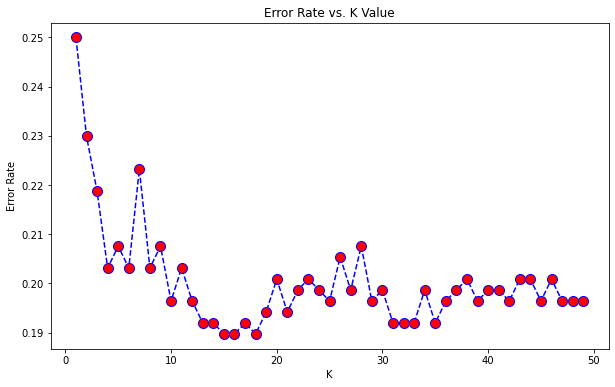

In [3]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

## Modelling

In [4]:
# Fitting K-NN to the Training set (4 variables)
knn = KNeighborsClassifier(n_neighbors = 14, metric = 'minkowski', p = 4).fit(X_train, y_train)

In [5]:
# Predicting the Test set results
y_pred = knn.predict(X_test)
knn.score(X_test,y_test).round(2)

0.8

In [6]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[321  19]
 [ 70  38]]


Проанализировав матрицу, можем сказать, что неверно распознанных элементов 89. Точность модели = 80% Специфичность = 94% Чувствительность = 35%. 